## Introduction
The dataset describes various Movies and TV shows found on Netflix and Amazon Prime Videos.The dataset can be found at [Popular Movies n TV shows dataset](https://www.kaggle.com/jyotmakadiya/popular-movies-and-tv-shows-amazon-prime-netflix)    

If you find this notebook helpful, please don't forget to share your thoughts and upvote!!!         
Let's explore the content of the data and see what we can conclude

## Exploratory Analysis


In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing
import seaborn as sns
import pandas_profiling

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")


There is 1 csv file in the current version of the dataset:     
Popular Movies TV shows from Prime Videos Netflix version_3.csv

In [2]:
# Popular Movies TV shows from Prime Videos Netflix version_3.csv  let's see the data in raw format
df1 = pd.read_csv('/kaggle/input/Popular Movies TV shows from Prime Videos Netflix version_3.csv',delimiter = ',')
df1.head(10)

,Unnamed: 0,ID,Title,Year,Rating,IMDb,Rotten Tomatoes,Genre,Netflix,Amazon Prime Video
0,0,1,Terminator: Dark Fate,2019,18+,6.2,81,Action & Adventure,0,1
1,1,2,Gemini Man,2019,13+,5.7,74,Action & Adventure,0,1
2,2,3,Rambo: Last Blood,2019,18+,6.1,72,Action & Adventure,0,1
3,3,4,The Courier,2019,18+,4.9,50,Action & Adventure,0,1
4,4,5,Crawl,2019,18+,6.1,79,Action & Adventure,0,1
5,5,6,The Kill Team,2019,18+,5.9,61,Action & Adventure,0,1
6,6,7,The Rhythm Section,2020,18+,5.3,63,Action & Adventure,0,1
7,7,8,Legionnaire's Trail,2020,18+,3.1,39,Action & Adventure,0,1
8,8,9,The Avengers,2012,13+,8.0,94,Action & Adventure,0,1
9,9,10,Escape Plan: The Extractors,2019,18+,4.4,49,Action & Adventure,0,1


In [3]:
df1.describe()

,Unnamed: 0,ID,Year,Netflix,Amazon Prime Video
count,24664.000000,24664.000000,24664.000000,24664.000000,24664.000000
mean,12331.500000,12332.500000,2002.311953,0.163193,0.836807
std,7120.027856,7120.027856,21.788365,0.369549,0.369549
min,0.000000,1.000000,1912.000000,0.000000,0.000000
25%,6165.750000,6166.750000,1999.000000,0.000000,1.000000
50%,12331.500000,12332.500000,2012.000000,0.000000,1.000000
75%,18497.250000,18498.250000,2016.000000,0.000000,1.000000
max,24663.000000,24664.000000,2021.000000,1.000000,1.000000


In [4]:
#separate features 
features = ['ID', 'Title', 'Year', 'Rating', 'IMDb',
       'Rotten Tomatoes', 'Genre', 'Netflix', 'Amazon Prime Video']

#generate data profile
profile = pandas_profiling.ProfileReport(df1[features])
profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

We can see that there are a lot of values missing in Age rating variable, a few in IMDb.    
There are some interesting conclusions we can draw from the statistics of this data:
* The mean year of production is around 2002,with standard deviation 21 so most of the movies in the dataset lie around 2020 and 1980s, which resembles with our general understanding as most of the movies/TV shows found on Netflix/Prime Videos lie in these range
* There are 14 different genres, from which Drama seems to be the largest one having around 6000 entries
* Around 75% of the movies are found on Amazon Prime Videos and 25% found on Netflix (can be seen from 0,1 ratio)
* Finally We can see multiple titles on the dataset, which indicates that same movie can be found on netflix and prime videos under multile genre, which is pretty interesting

## Let's do some data cleaning

In [5]:
#before we move to that we need to clean the data, remove missing values 
features = ['ID', 'Title', 'Year', 'Rating', 'IMDb',
       'Rotten Tomatoes', 'Genre', 'Netflix', 'Amazon Prime Video']

train_data = df1[features].copy()
train_data.isnull().sum()

ID                        0
Title                     0
Year                      0
Rating                14635
IMDb                    420
Rotten Tomatoes           0
Genre                     0
Netflix                   0
Amazon Prime Video        0
dtype: int64

It seems that around 60% of age Rating value and 420 IMdb rating are missing, We will drop IMDb NULL rows and Age rating column doesn't seem to help in further analysis. So, we will drop age rating feature altogether

In [6]:
train_data = train_data.drop('Rating',axis = 1)

In [7]:
train_data = train_data.dropna()
train_data

,ID,Title,Year,IMDb,Rotten Tomatoes,Genre,Netflix,Amazon Prime Video
0,1,Terminator: Dark Fate,2019,6.2,81,Action & Adventure,0,1
1,2,Gemini Man,2019,5.7,74,Action & Adventure,0,1
2,3,Rambo: Last Blood,2019,6.1,72,Action & Adventure,0,1
3,4,The Courier,2019,4.9,50,Action & Adventure,0,1
4,5,Crawl,2019,6.1,79,Action & Adventure,0,1
...,...,...,...,...,...,...,...,...
24658,24659,Hole in the Wall,2017,7.9,41,Drama,1,0
24659,24660,Mama's Boy,2018,4.9,33,Drama,1,0
24660,24661,I Am Jonas,2018,7.0,52,Drama,1,0
24661,24662,An Unremarkable Christmas,2020,3.6,41,Drama,1,0


In [8]:
features.remove('Rating')
train_data.isnull().sum()

ID                    0
Title                 0
Year                  0
IMDb                  0
Rotten Tomatoes       0
Genre                 0
Netflix               0
Amazon Prime Video    0
dtype: int64

In [9]:

#train_data["IMDb"] = pd.to_numeric(train_data['IMDb'])
def convert_to_float(x):
    imdb = x[0]
    try:
        return float(imdb)
    except:
        print('the unwanted value is:',imdb)
        
    return imdb
train_data["IMDb"] = train_data[['IMDb']].apply(convert_to_float,axis = 1)
train_data

the unwanted value is: d;}
the unwanted value is: d;}
the unwanted value is: d;}
the unwanted value is: d;}
the unwanted value is: d;}


,ID,Title,Year,IMDb,Rotten Tomatoes,Genre,Netflix,Amazon Prime Video
0,1,Terminator: Dark Fate,2019,6.2,81,Action & Adventure,0,1
1,2,Gemini Man,2019,5.7,74,Action & Adventure,0,1
2,3,Rambo: Last Blood,2019,6.1,72,Action & Adventure,0,1
3,4,The Courier,2019,4.9,50,Action & Adventure,0,1
4,5,Crawl,2019,6.1,79,Action & Adventure,0,1
...,...,...,...,...,...,...,...,...
24658,24659,Hole in the Wall,2017,7.9,41,Drama,1,0
24659,24660,Mama's Boy,2018,4.9,33,Drama,1,0
24660,24661,I Am Jonas,2018,7.0,52,Drama,1,0
24661,24662,An Unremarkable Christmas,2020,3.6,41,Drama,1,0


We can see some string values which are causing error when converting to float, so we get rid of them

In [10]:
train_data = train_data[train_data.IMDb != 'd;}']
train_data

,ID,Title,Year,IMDb,Rotten Tomatoes,Genre,Netflix,Amazon Prime Video
0,1,Terminator: Dark Fate,2019,6.2,81,Action & Adventure,0,1
1,2,Gemini Man,2019,5.7,74,Action & Adventure,0,1
2,3,Rambo: Last Blood,2019,6.1,72,Action & Adventure,0,1
3,4,The Courier,2019,4.9,50,Action & Adventure,0,1
4,5,Crawl,2019,6.1,79,Action & Adventure,0,1
...,...,...,...,...,...,...,...,...
24658,24659,Hole in the Wall,2017,7.9,41,Drama,1,0
24659,24660,Mama's Boy,2018,4.9,33,Drama,1,0
24660,24661,I Am Jonas,2018,7.0,52,Drama,1,0
24661,24662,An Unremarkable Christmas,2020,3.6,41,Drama,1,0


## Visualizations
Now our data is cleaned so we can visualize it with seaborn 

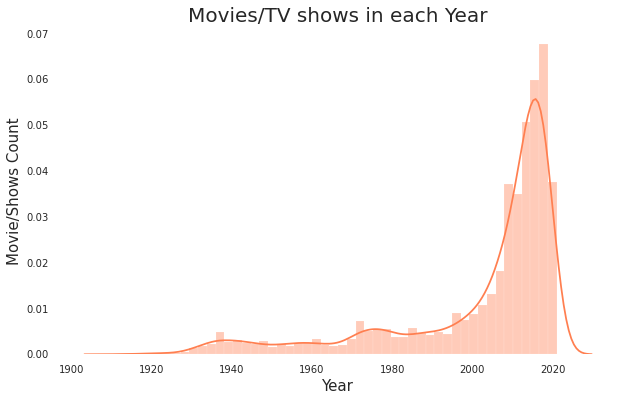

In [11]:
#movies/shows annual production data
plt.figure(figsize=(10,6))
fig = sns.distplot(train_data['Year'],color = 'coral')
fig.set_xlabel("Year",size=15)
fig.set_ylabel("Movie/Shows Count",size=15)
plt.title('Movies/TV shows in each Year',size = 20)
plt.show()

We can see most of the movies/shows are after 1980s, so we can make scaled plot
(The above plot is skewed, we scale it to get a better view)

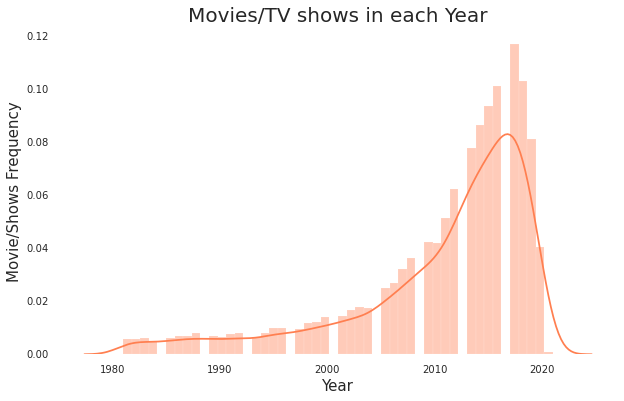

In [12]:
plt.figure(figsize=(10,6))
fig = sns.distplot(train_data[train_data['Year'] > 1980]["Year"],color = 'coral')
fig.set_xlabel("Year",size=15)
fig.set_ylabel("Movie/Shows Frequency",size=15)
#fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.title('Movies/TV shows in each Year',size = 20)
plt.show()

### Let's visualize the IMDb rating data

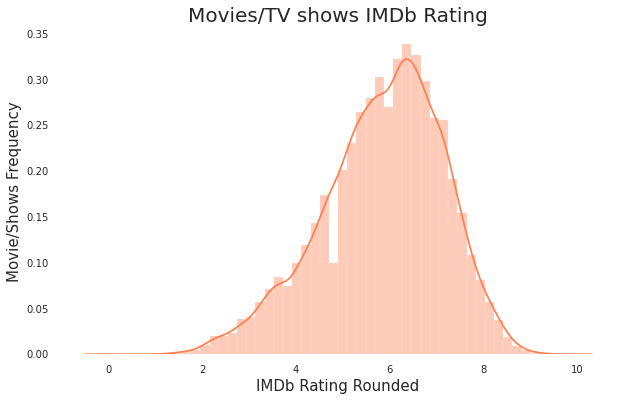

In [13]:
plt.figure(figsize=(10,6))
fig = sns.distplot(train_data["IMDb"],color = 'coral')
fig.set_xlabel("IMDb Rating Rounded",size=15)
fig.set_ylabel("Movie/Shows Frequency",size=15)
plt.title('Movies/TV shows IMDb Rating',size = 20)
plt.show()

Now that looks like a gaussian distribution 

### There are 14 different Genres

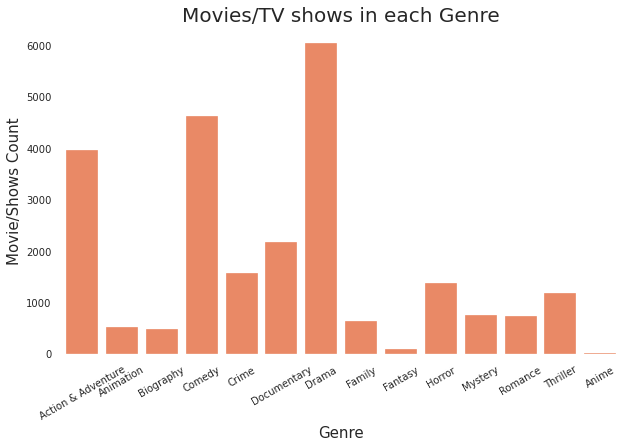

In [14]:
plt.figure(figsize=(10,6))
fig = sns.countplot(train_data["Genre"],color = 'coral')
fig.set_xlabel("Genre",size=15)
fig.set_ylabel("Movie/Shows Count",size=15)
fig.set_xticklabels(fig.get_xticklabels(),rotation=30)
plt.title('Movies/TV shows in each Genre',size = 20)
plt.show()

*  The Rotten Tomatoes distribution is good approximation of gaussian distribution, although a little bit skewed

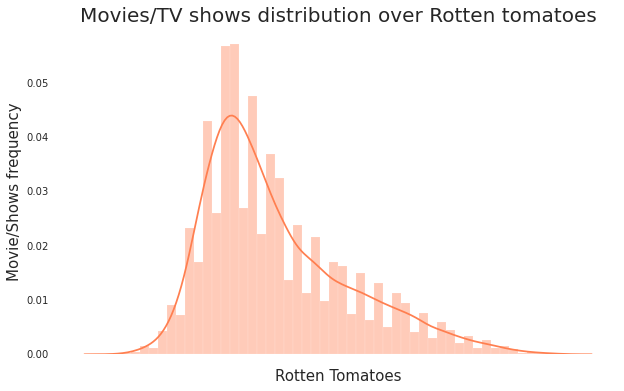

In [15]:
plt.figure(figsize=(10,6))
fig = sns.distplot(train_data["Rotten Tomatoes"],color = 'coral')
fig.set_xlabel("Rotten Tomatoes",size=15)
fig.set_ylabel("Movie/Shows frequency",size=15)
fig.set_xticklabels(fig.get_xticklabels(),rotation=30)
plt.title('Movies/TV shows distribution over Rotten tomatoes',size = 20)
plt.show()

 ## Feature Generation
We generate new feature, popularity Rating from IMDb and Rotten Tomatoes (which may not be absolutely correct but better than IMDb and Rotten Tomatoes alone)     
* The idea is that if we know that it has higher IMDb rating and higher Rotten Tomatoes percentage, it should be popular, atleast that's what general inference concludes
* So we use IMdb + Rotten Tomatoes/10 to get popularity rank ( assuming equal weightage to both features)

In [16]:
train_data["Rotten Tomatoes"] = pd.to_numeric(train_data['Rotten Tomatoes'])
train_data["Popularity Rating"] = (train_data["IMDb"] + train_data['Rotten Tomatoes']/10.0)/2
train_data.head()

,ID,Title,Year,IMDb,Rotten Tomatoes,Genre,Netflix,Amazon Prime Video,Popularity Rating
0,1,Terminator: Dark Fate,2019,6.2,81,Action & Adventure,0,1,7.15
1,2,Gemini Man,2019,5.7,74,Action & Adventure,0,1,6.55
2,3,Rambo: Last Blood,2019,6.1,72,Action & Adventure,0,1,6.65
3,4,The Courier,2019,4.9,50,Action & Adventure,0,1,4.95
4,5,Crawl,2019,6.1,79,Action & Adventure,0,1,7.00


* Now Let's visualize that new feature

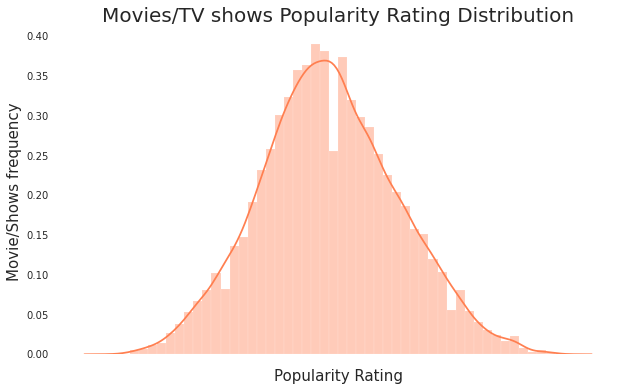

In [17]:
plt.figure(figsize=(10,6))
fig = sns.distplot(train_data["Popularity Rating"],color = 'coral')
fig.set_xlabel("Popularity Rating",size=15)
fig.set_ylabel("Movie/Shows frequency",size=15)
fig.set_xticklabels(fig.get_xticklabels(),rotation=30)
plt.title('Movies/TV shows Popularity Rating Distribution',size = 20)
plt.show()

* That's almost perfect Gaussian Distribution!! Now we can know that not all the movies/shows are like Avengers Endgame/Sherlock Holmes!! Most of them lies in the middle which resonates with our understandings!! pretty Good!!
* Let's find out top 10 most popular movies/shows in our dataset

In [18]:
a=train_data['Popularity Rating'].sort_values(ascending=False).head(10)

train_data.loc[a.index]

,ID,Title,Year,IMDb,Rotten Tomatoes,Genre,Netflix,Amazon Prime Video,Popularity Rating
2828,2829,Once Upon a Time in the West,1968,8.5,93,Action & Adventure,0,1,8.90
20940,20941,Monty Python and the Holy Grail,1975,8.2,93,Comedy,1,0,8.75
22233,22234,Monty Python and the Holy Grail,1975,8.2,93,Action & Adventure,1,0,8.75
8,9,The Avengers,2012,8.0,94,Action & Adventure,0,1,8.70
21440,21441,Casino Royale,2006,8.0,93,Action & Adventure,1,0,8.65
603,604,Casino Royale,2006,8.0,93,Action & Adventure,0,1,8.65
20862,20863,There Will Be Blood,2007,8.2,91,Drama,1,0,8.65
22450,22451,Dangal,2016,8.4,88,Drama,1,0,8.60
22687,22688,Dangal,2016,8.4,88,Action & Adventure,1,0,8.60
1178,1179,The Bourne Ultimatum,2007,8.0,92,Action & Adventure,0,1,8.60


* That was unexpected (somewhat) but still it's cool as we know this is a good indicator of popularity!!

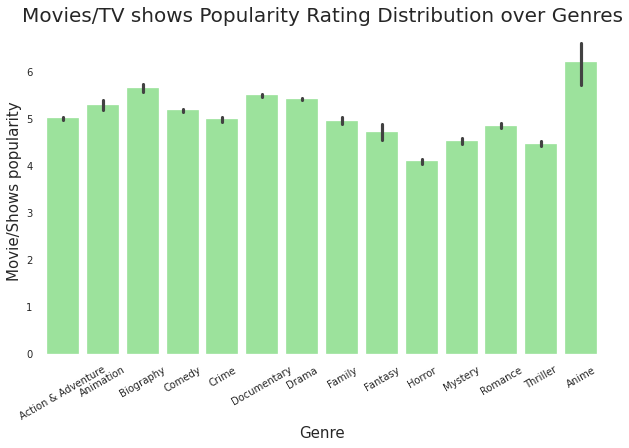

In [19]:
plt.figure(figsize=(10,6))
fig = sns.barplot(x = 'Genre', y = 'Popularity Rating',data = train_data,color = 'lightgreen')
fig.set_xlabel("Genre",size=15)
fig.set_ylabel("Movie/Shows popularity",size=15)
fig.set_xticklabels(fig.get_xticklabels(),rotation=30)
plt.title('Movies/TV shows Popularity Rating Distribution over Genres',size = 20)
plt.show()

* You can see that horror has lowest rating, now I know why many of the box office bombs are in horror genre!!
* Anime is relatively more popular, that's neat!!

## Conclusion
The dataset seems pretty interesting as we can that as Rotten Tomatoes increases, the no of movies/shows decreases. The IMDb rating shows large number movies/shows lie in mid range, describing average performance. There are a few things to notice:   
* The popularity Rating feature seems to give much clearer view about the popularity of any movie/tv show than only IMDb and Rotten Tomatoes.
* Genre-wise popularity shows a general trend towards anime, biography and action movies/shows whereas genres like horror and thriller were less popular
* Top movies/shows from popularity Rating appeared as multiple data points, giving information such as same movie/shows can be found in multiple genres, thus it's highly likely that data collection was done based on genre and then data was combined.   

Thanks for Reading this Notebook!! Upvote it if you like it!! Please don't forget to see my dataset [Popular Movies/Shows](https://www.kaggle.com/jyotmakadiya/popular-movies-and-tv-shows-amazon-prime-netflix)